In [1]:
import glob
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msmo

In [2]:
#First collect all the 12 files of months to one file has all the data..
#Step 2 Made them joined all together
#Step 3 collect all of them and keeped on a variable

In [3]:
files = glob.glob(r"C:\\Users\eslam\Dropbox\PC\Downloads\final project/*.csv")
df = pd.DataFrame()
for f in files:
    csv = pd.read_csv(f)
    df = df.append(csv)

C:\Users\eslam\AppData\Local\Temp\ipykernel_10232\698533337.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(csv)
C:\Users\eslam\AppData\Local\Temp\ipykernel_10232\698533337.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(csv)
C:\Users\eslam\AppData\Local\Temp\ipykernel_10232\698533337.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(csv)
C:\Users\eslam\AppData\Local\Temp\ipykernel_10232\698533337.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(csv)
C:\Users\eslam\AppData\Local\Temp\ipykernel_10232\698533337.py:5: FutureWarning: The frame.append method is deprecat

In [4]:
#Here is the data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
### I will tuning the data 

In [6]:
# I find the data has a lot of nans
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# I will drop nans 
df.dropna(subset = ['Order ID'] , axis=0 , inplace=True)

In [8]:
# here I clean data from nans
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
## I find some nans 
df['Order ID'].value_counts()

Order ID    355
160873        5
289117        4
226625        4
277875        4
           ... 
158177        1
158178        1
158179        1
158180        1
259357        1
Name: Order ID, Length: 178438, dtype: int64

In [10]:
# I will drop nans
df.drop(df.index[df['Order ID']=='Order ID'],axis=0,inplace=True)

In [11]:
df['Order ID'].value_counts() ## here I drop nans

160873    5
277875    4
295681    4
289117    4
165665    4
         ..
158076    1
158077    1
158078    1
158079    1
259357    1
Name: Order ID, Length: 175449, dtype: int64

In [12]:
# finally data become clean from nans
# the data was not arranged
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
df = df.reset_index(drop=True) 

In [14]:
# the data become arranged
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
df['Product'].unique()  # I want to show the unique values in product

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [16]:
df['Product'].value_counts() ## show the most product sell

USB-C Charging Cable          21523
Lightning Charging Cable      21308
AAA Batteries (4-pack)        20293
AA Batteries (4-pack)         20214
Wired Headphones              18552
Apple Airpods Headphones      15273
Bose SoundSport Headphones    13109
27in FHD Monitor               7386
iPhone                         6725
27in 4K Gaming Monitor         6122
34in Ultrawide Monitor         6058
Google Phone                   5433
Flatscreen TV                  4705
Macbook Pro Laptop             4641
ThinkPad Laptop                4052
20in Monitor                   4032
Vareebadd Phone                2020
LG Washing Machine              649
LG Dryer                        640
Name: Product, dtype: int64

In [17]:
df['Purchase Address']

0                    917 1st St, Dallas, TX 75001
1               682 Chestnut St, Boston, MA 02215
2            669 Spruce St, Los Angeles, CA 90001
3            669 Spruce St, Los Angeles, CA 90001
4               333 8th St, Los Angeles, CA 90001
                           ...                   
182730     840 Highland St, Los Angeles, CA 90001
182731    216 Dogwood St, San Francisco, CA 94016
182732       220 12th St, San Francisco, CA 94016
182733     511 Forest St, San Francisco, CA 94016
182734     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 182735, dtype: object

In [18]:
## here i slicing the cities from Purchase Address
x = df['Purchase Address']
type(x)
x= list(x)
type(x)

list

In [19]:
y = []
for s in x:
    y.append(s.split(','))

In [20]:
z = []
for i in (range(len(y))):
    z.append(y[i][1])

In [21]:
df['Cities'] = z ## add the new colomun(cities) to data 

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles


In [23]:
## here I slicing the months from Order Date and add new colomun(months) to data 
df.drop_duplicates(inplace=True, subset=["Order ID"])
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

In [24]:
df.head()##show the dataframe after filters , order  and tuning

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Cities,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,4
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,4
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",San Francisco,4


In [25]:
################################### Start visualization #############################################

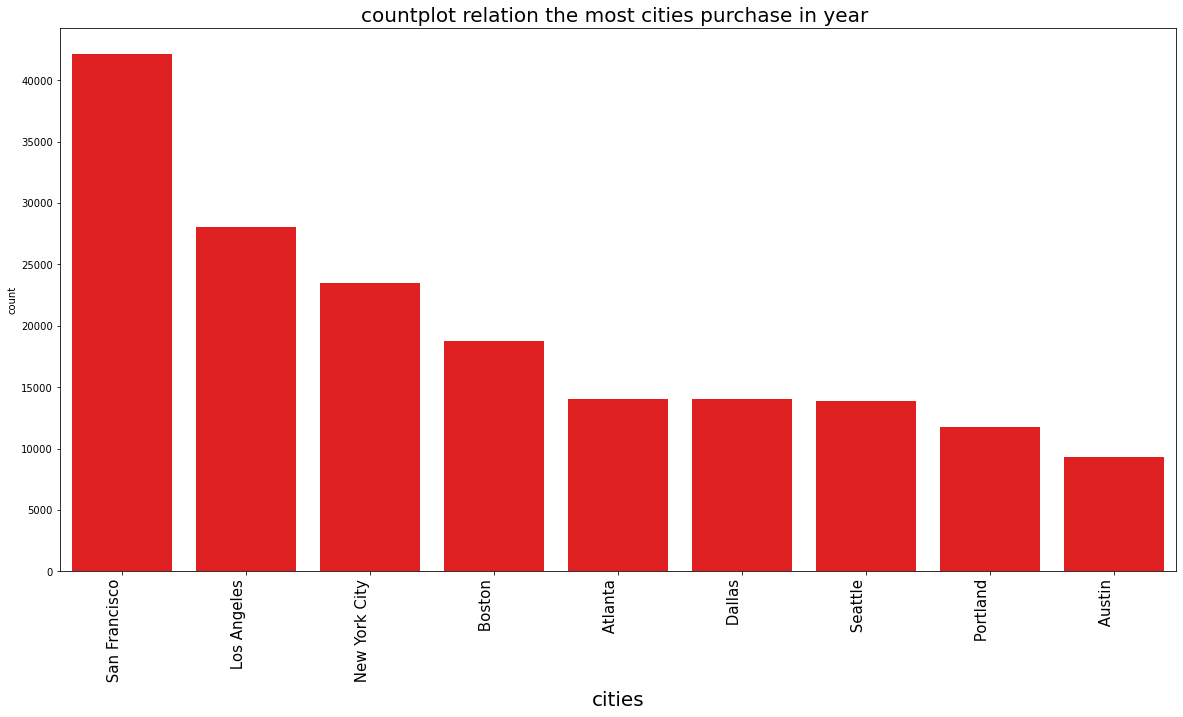

In [26]:
## countplot show the most cities purchase in year
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df['Cities'] ,data = df ,color='red',
                   order=df['Cities'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=15)
plt.xlabel('cities',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot relation the most cities purchase in year ',fontsize=20)
plt.show()

In [27]:
## countplot show the most cities purchase in year is San Francisco

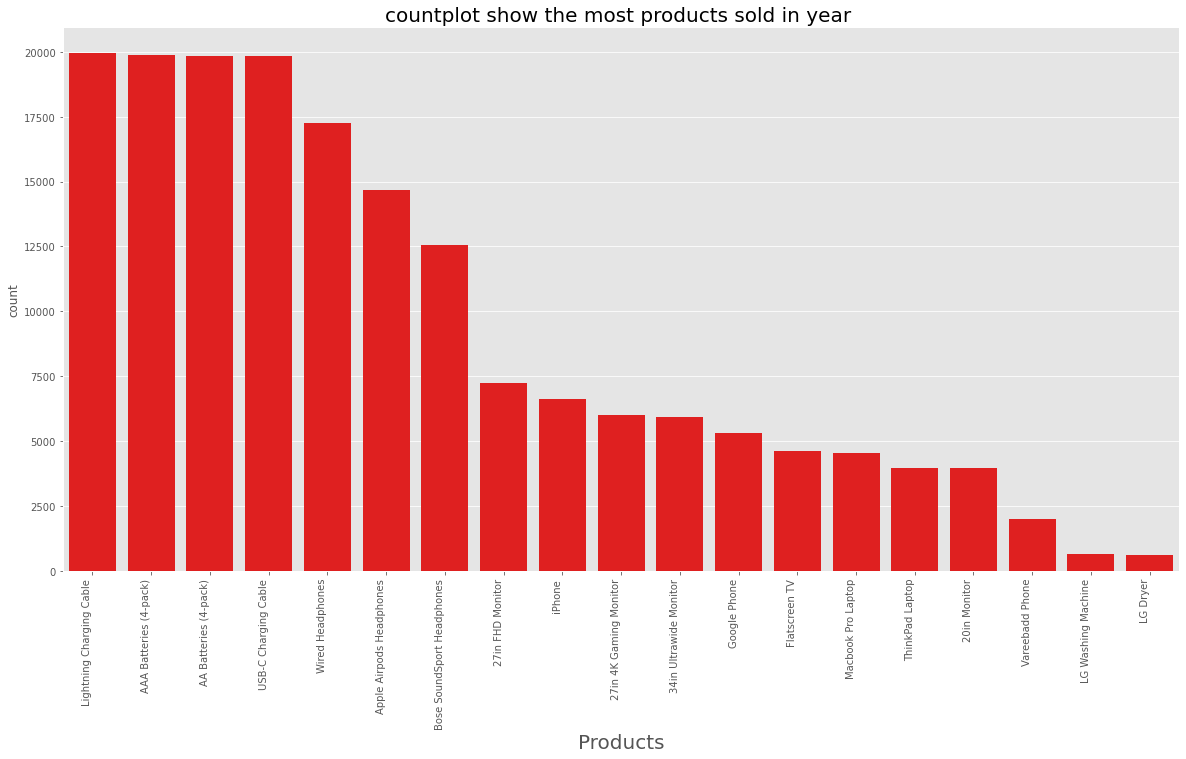

In [28]:
### countplot show the most products sold in year
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df['Product'] ,data = df ,color='red', 
                   order=df['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in year ',fontsize=20)
plt.show()

In [29]:
### countplot show the most products sold in year is Lightning Charging Cable

In [30]:
#### I will do visualization to the most products sold everymonth 

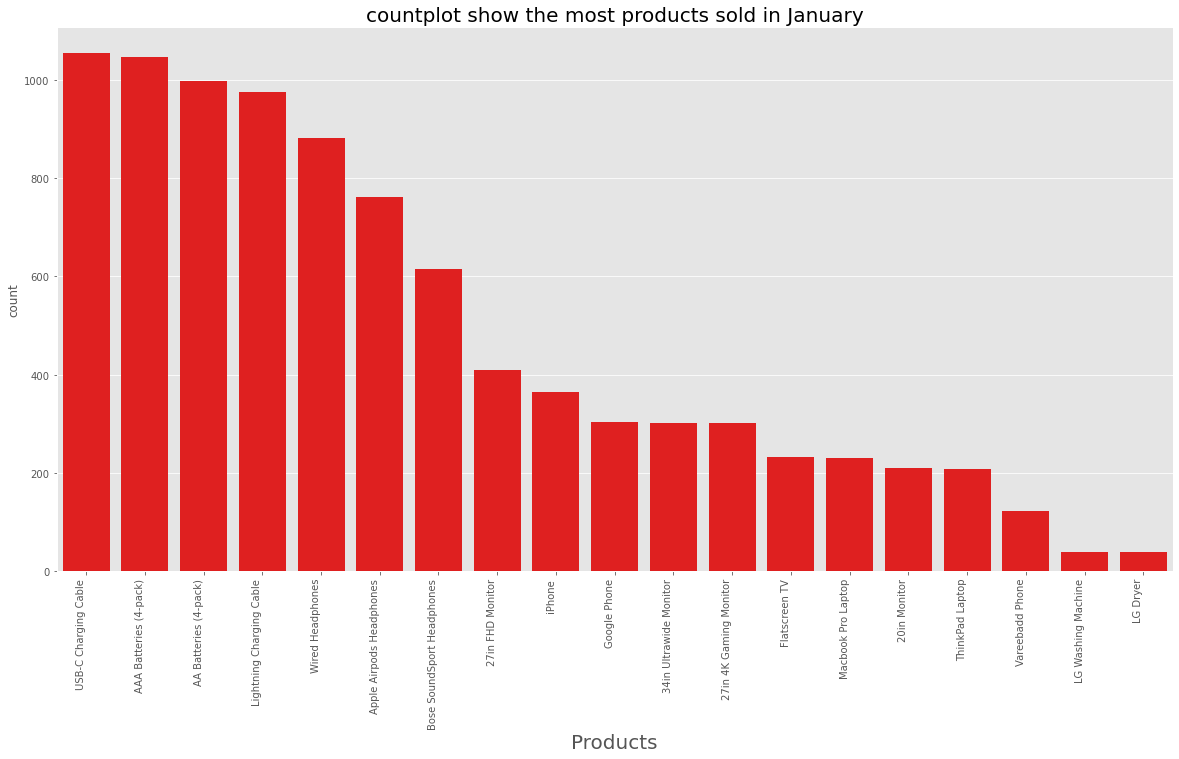

In [31]:
### countplot show the most products sold in January
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==1]['Product'] ,data = df ,color='red',
                   order=df[df['Month']==1]['Product'].value_counts().index  );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in January',fontsize=20)
plt.show()

In [32]:
### countplot show the most products sold in January is USB-C Charging Cable

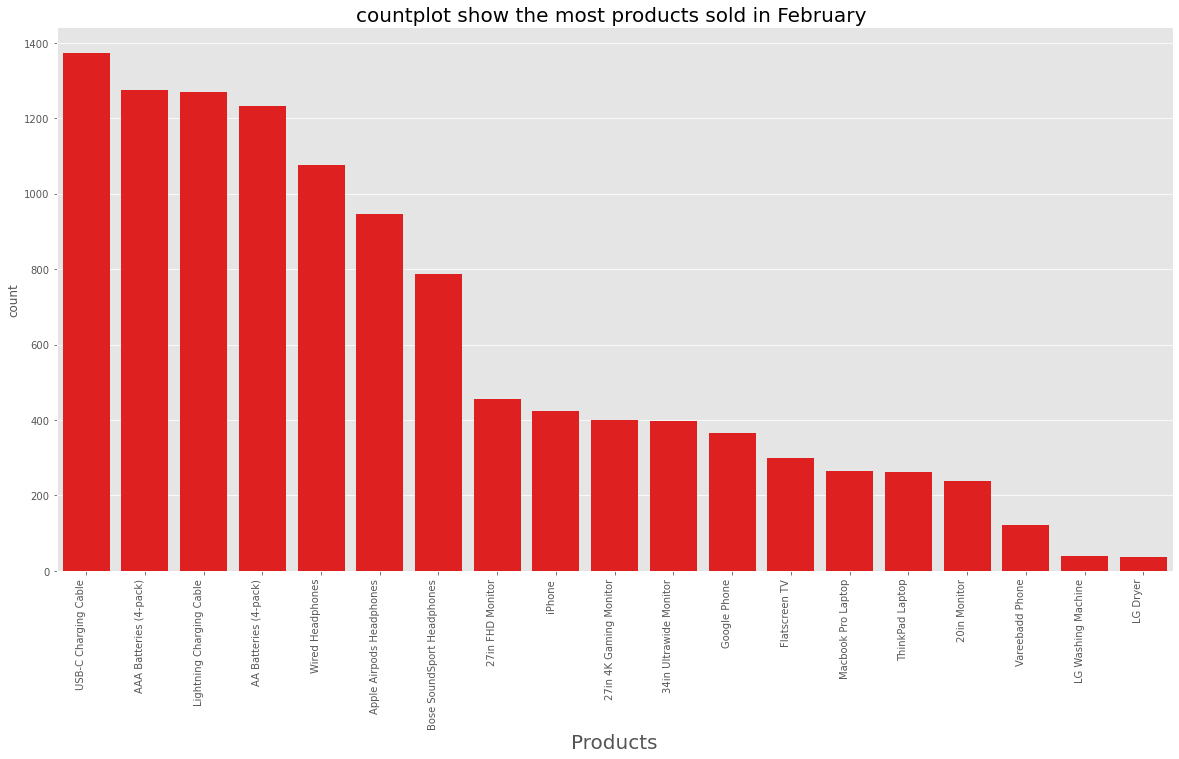

In [33]:
### countplot show the most products sold in February
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==2]['Product'] ,data = df ,color='red',
                   order=df[df['Month']==2]['Product'].value_counts().index  );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in February ',fontsize=20)
plt.show()

In [34]:
### countplot show the most products sold in February is USB-C Charging Cable

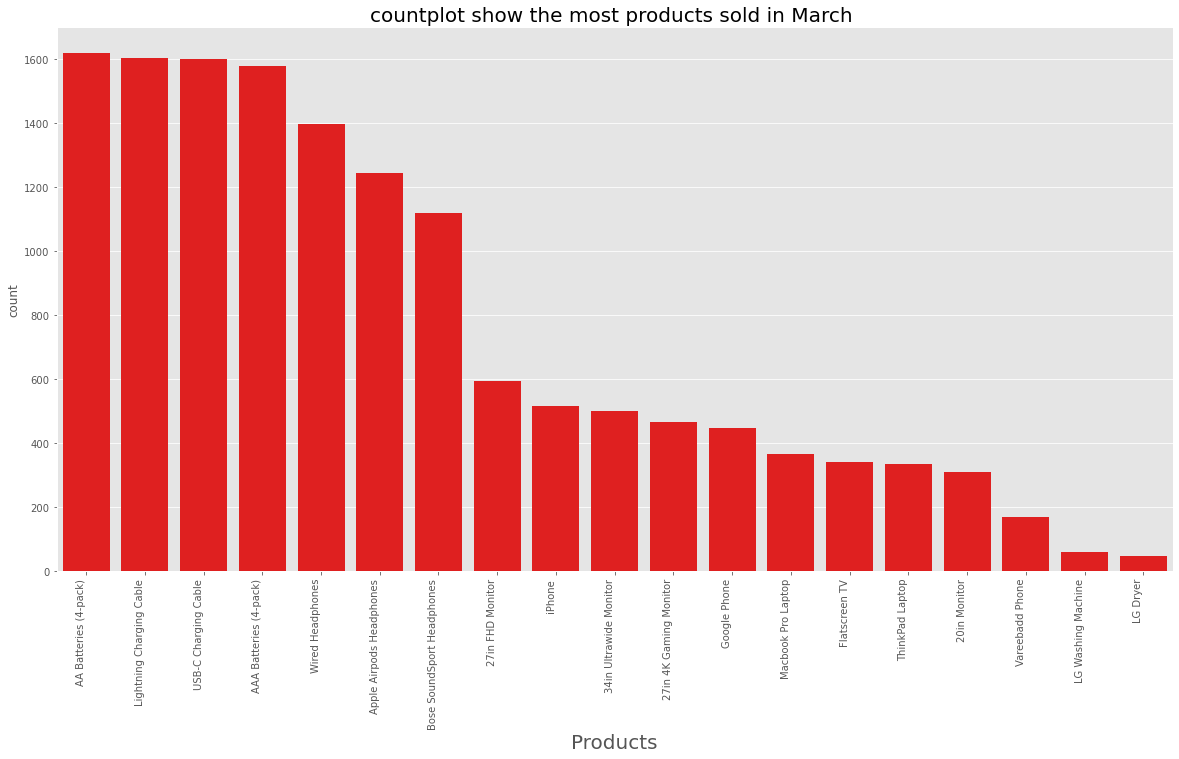

In [35]:
###countplot show the most products sold in March
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==3]['Product'] ,data = df ,color='red', 
                   order=df[df['Month']==3]['Product'] .value_counts().index  );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in March ',fontsize=20)
plt.show()

In [36]:
###countplot show the most products sold in March is AA Batteries (4-pack)

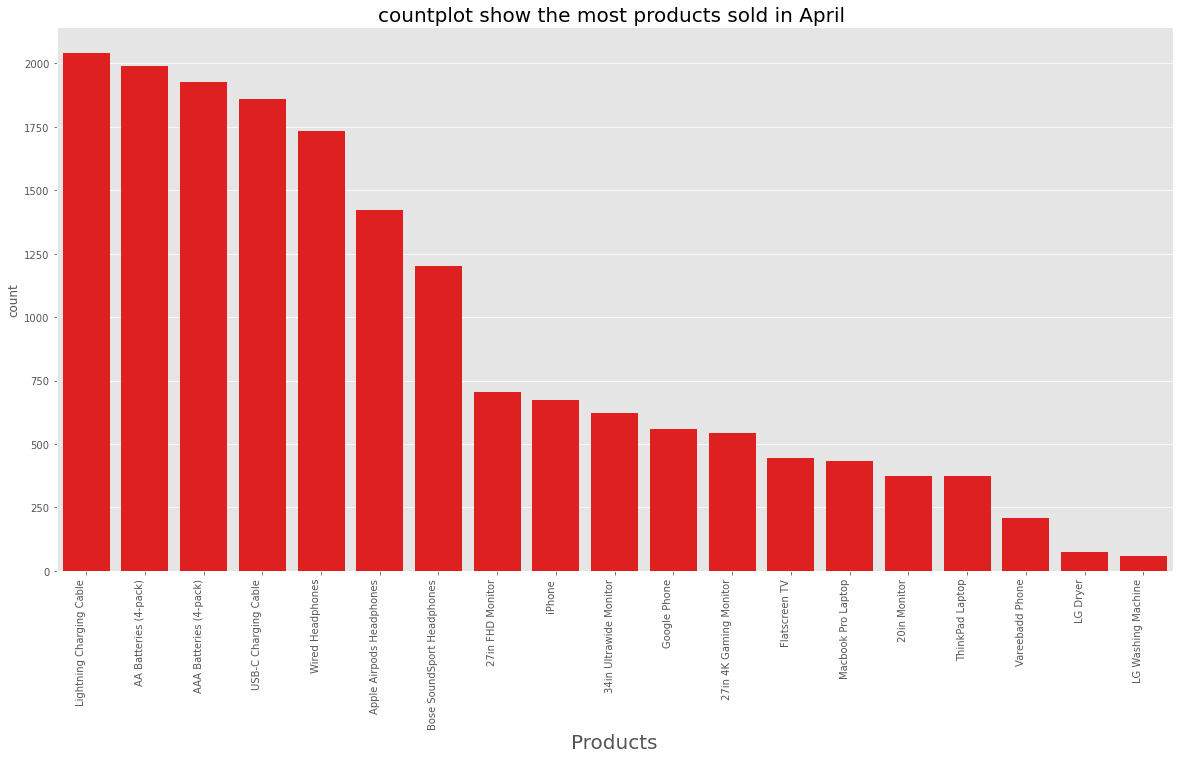

In [37]:
###countplot show the most products sold in April
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==4]['Product'] ,data = df ,color='red', 
                   order=df[df['Month']==4]['Product'].value_counts().index  );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in April ',fontsize=20)
plt.show()

In [38]:
###countplot show the most products sold in April is Lightning Charging Cable

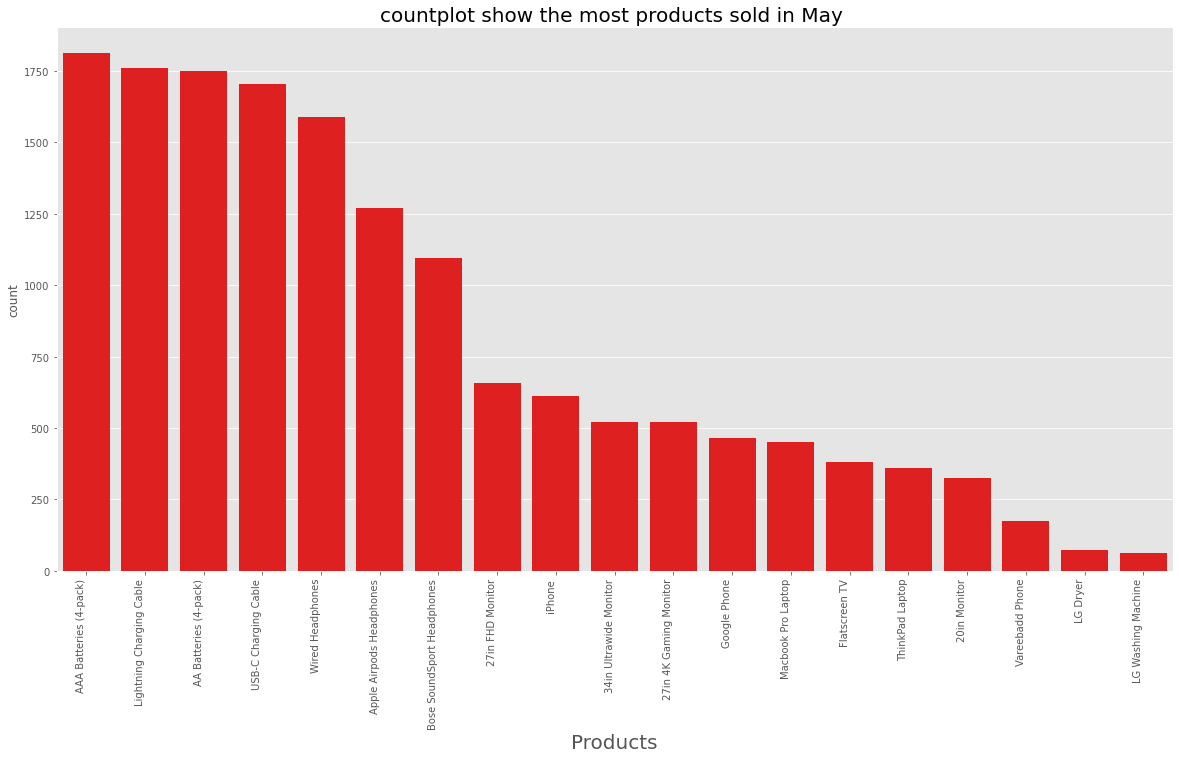

In [39]:
###countplot show the most products sold in May
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==5]['Product'] ,data = df ,color='red', 
                   order=df[df['Month']==5]['Product'].value_counts().index  );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in May ',fontsize=20)
plt.show()

In [40]:
###countplot show the most products sold in May is AAA Batteries (4-pack)

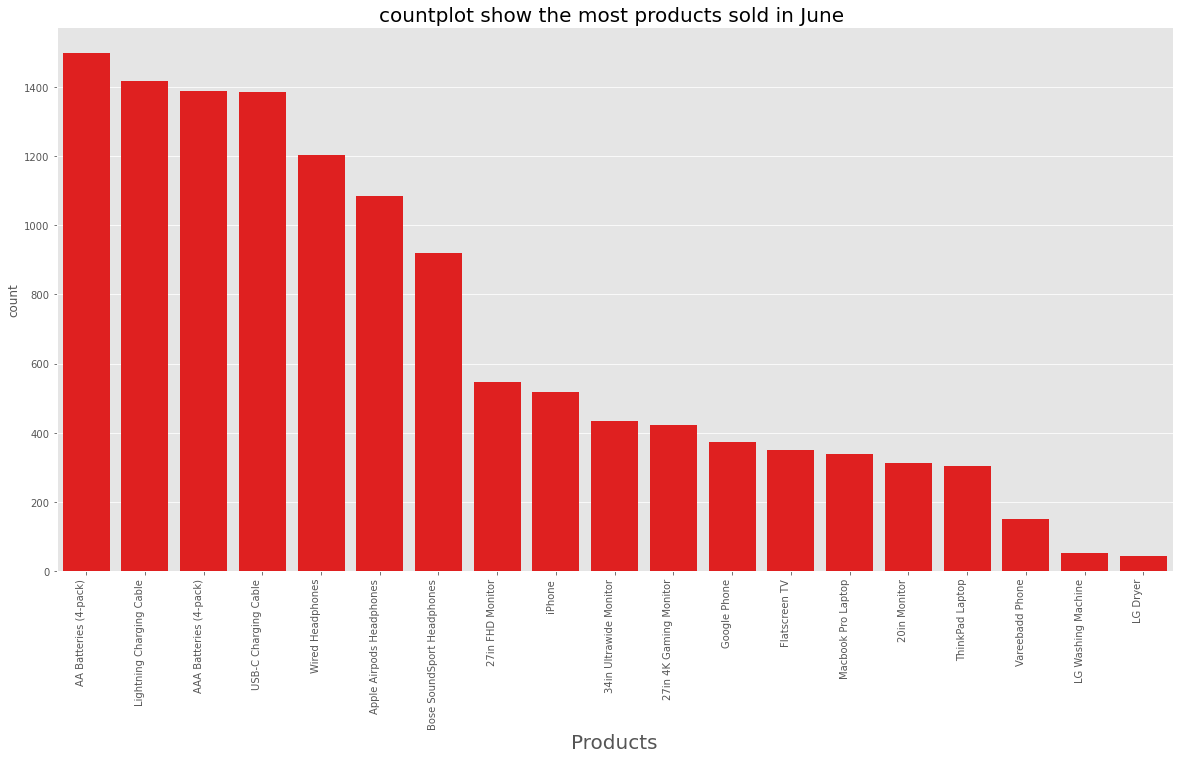

In [41]:
###countplot show the most products sold in June
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==6]['Product'] ,data = df ,color='red',
                   order=df[df['Month']==6]['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in June ',fontsize=20)
plt.show()

In [42]:
###countplot show the most products sold in June is AA Batteries (4-pack)

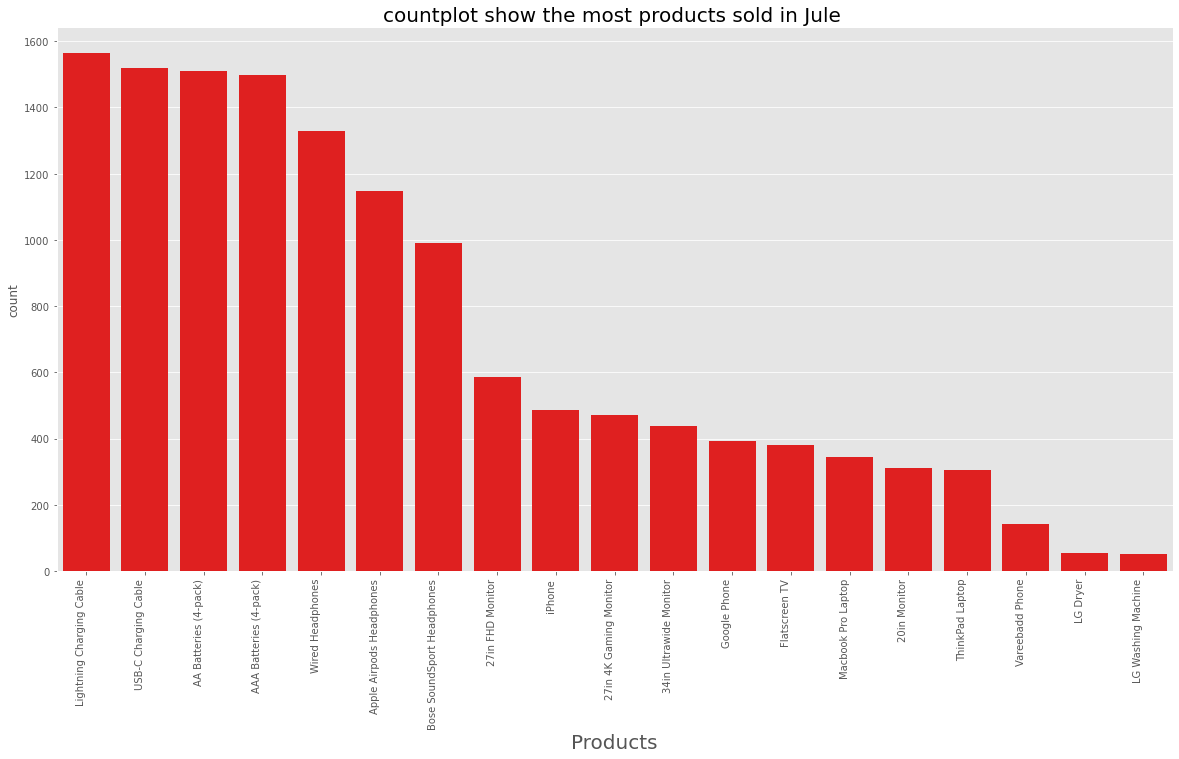

In [43]:
###countplot show the most products sold in Jule
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==7]['Product'] ,data = df ,color='red',
                   order=df[df['Month']==7]['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in Jule ',fontsize=20)
plt.show()

In [44]:
###countplot show the most products sold in Jule is Lightning Charging Cable

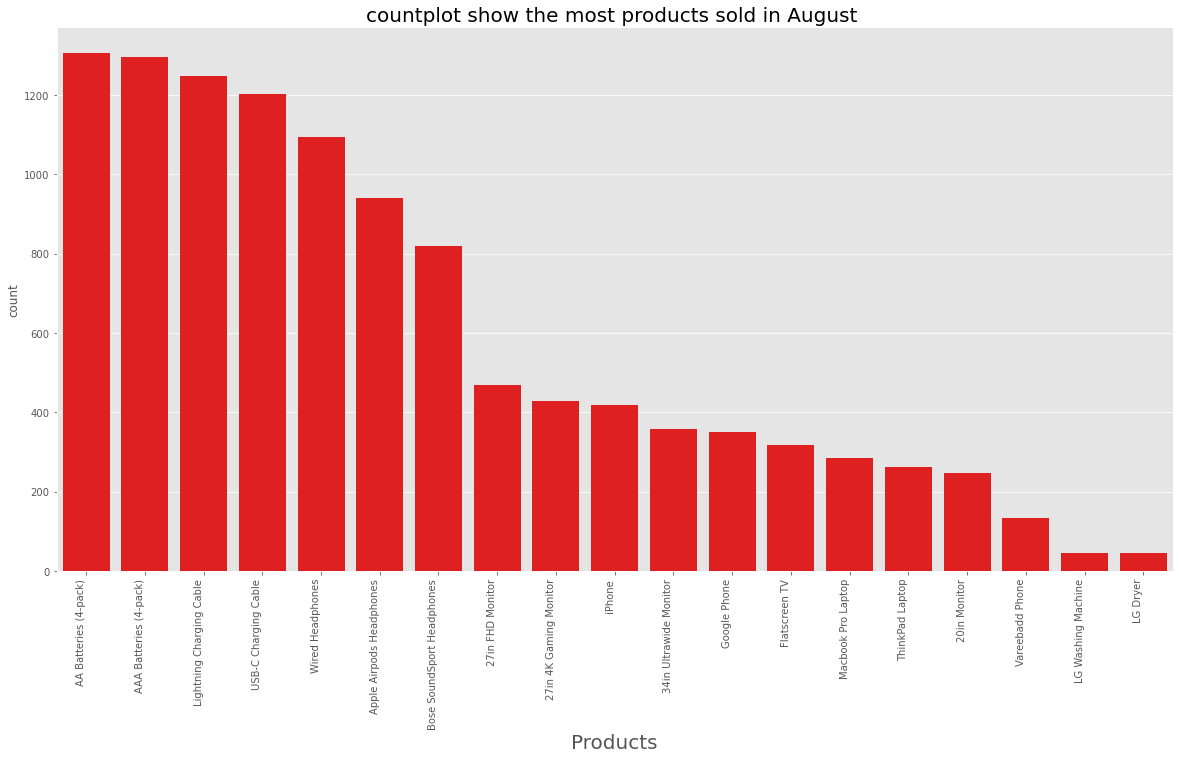

In [45]:
###countplot show the most products sold in August
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==8]['Product'] ,data = df ,color='red' , 
                   order=df[df['Month']==8]['Product'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in August ',fontsize=20)
plt.show()

In [46]:
###countplot show the most products sold in August is AA Batteries (4-pack)

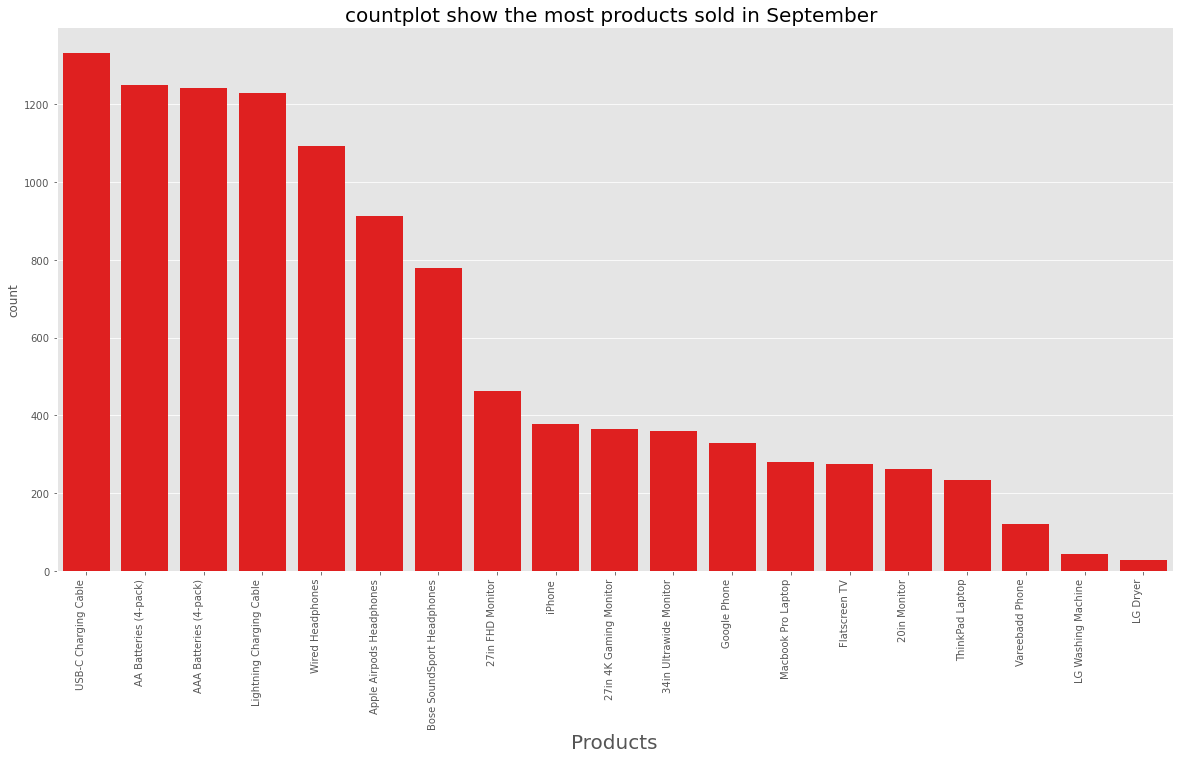

In [47]:
###countplot show the most products sold in September
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==9]['Product'] ,data = df ,color='red',
                   order=df[df['Month']==9]['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in September ',fontsize=20)
plt.show()

In [48]:
###countplot show the most products sold in September is USB-C Charging Cable

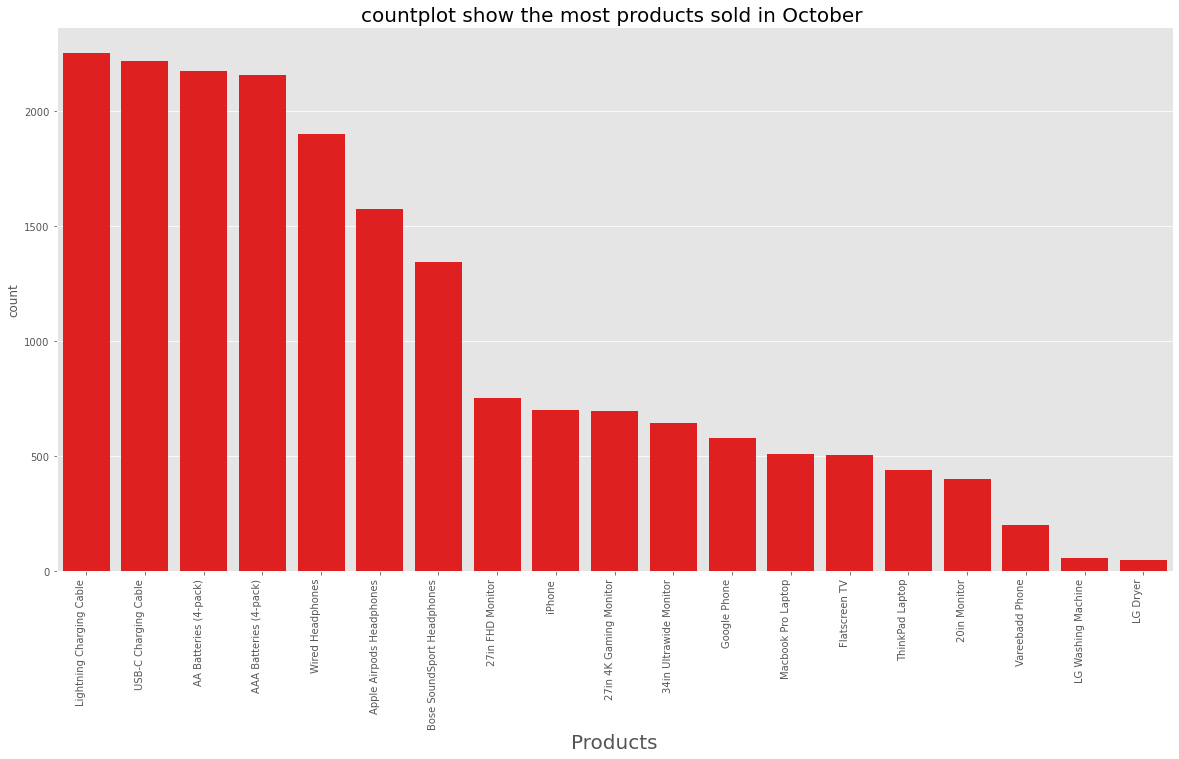

In [49]:
###countplot show the most products sold in October
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==10]['Product'] ,data = df ,color='red' ,
                   order=df[df['Month']==10]['Product'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in October ',fontsize=20)
plt.show()

In [50]:
###countplot show the most products sold in October is Lightning Charging Cable

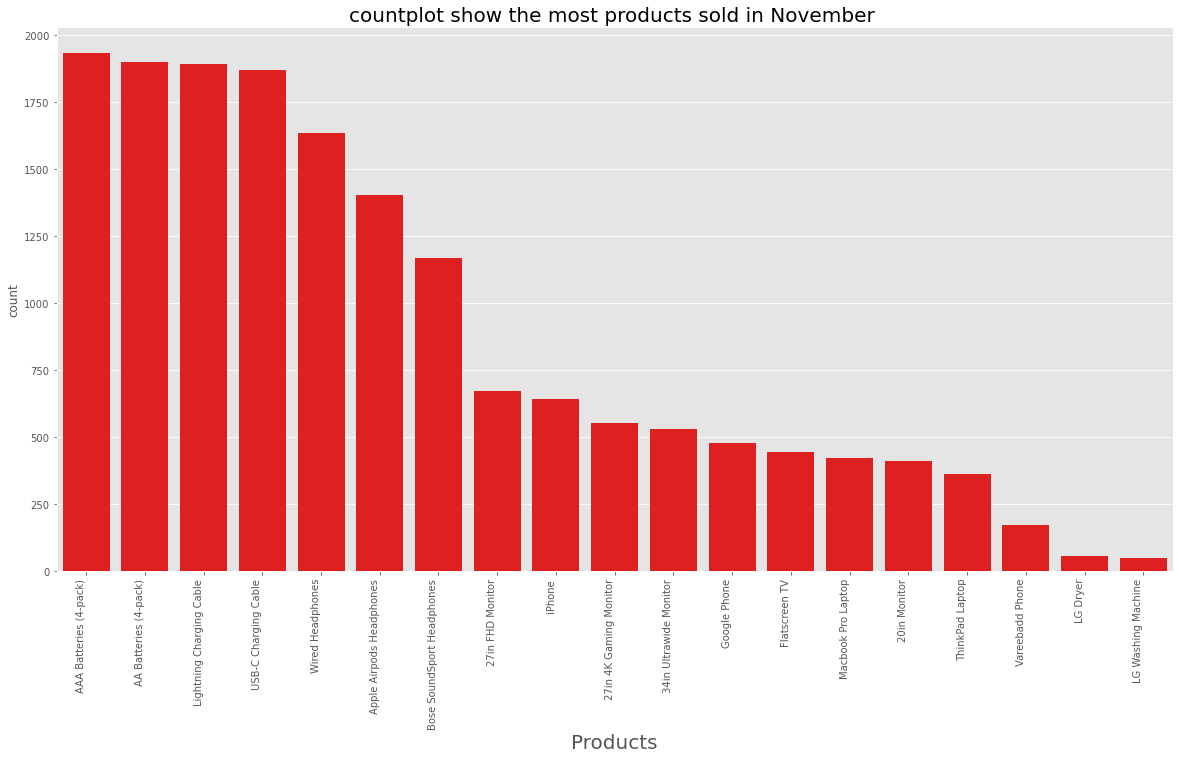

In [51]:
###countplot show the most products sold in November
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==11]['Product'] ,data = df ,color='red',
                   order=df[df['Month']==11]['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in November ',fontsize=20)
plt.show()

In [52]:
###countplot show the most products sold in November is AAA Batteries (4-pack)

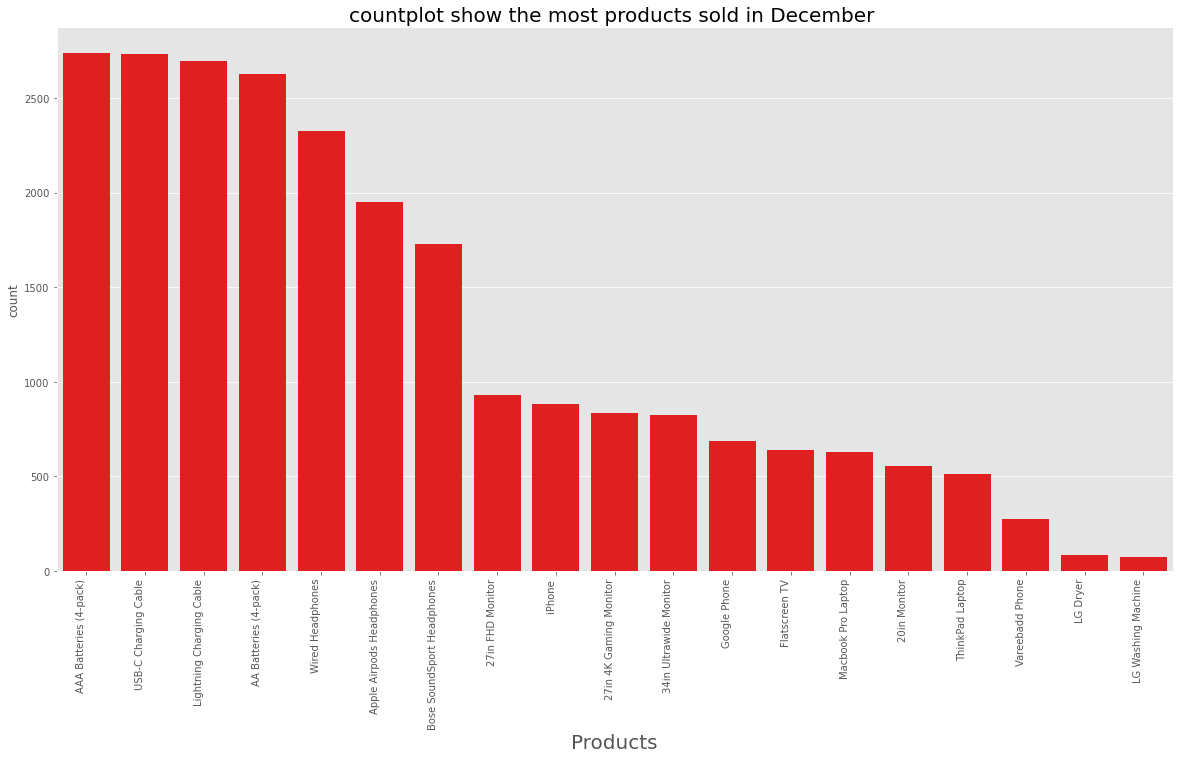

In [53]:
###countplot show the most products sold in December
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Month']==12]['Product'] ,data = df ,color='red',
                   order=df[df['Month']==12]['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in December ',fontsize=20)
plt.show()

In [54]:
###countplot show the most products sold in December is AAA Batteries (4-pack)

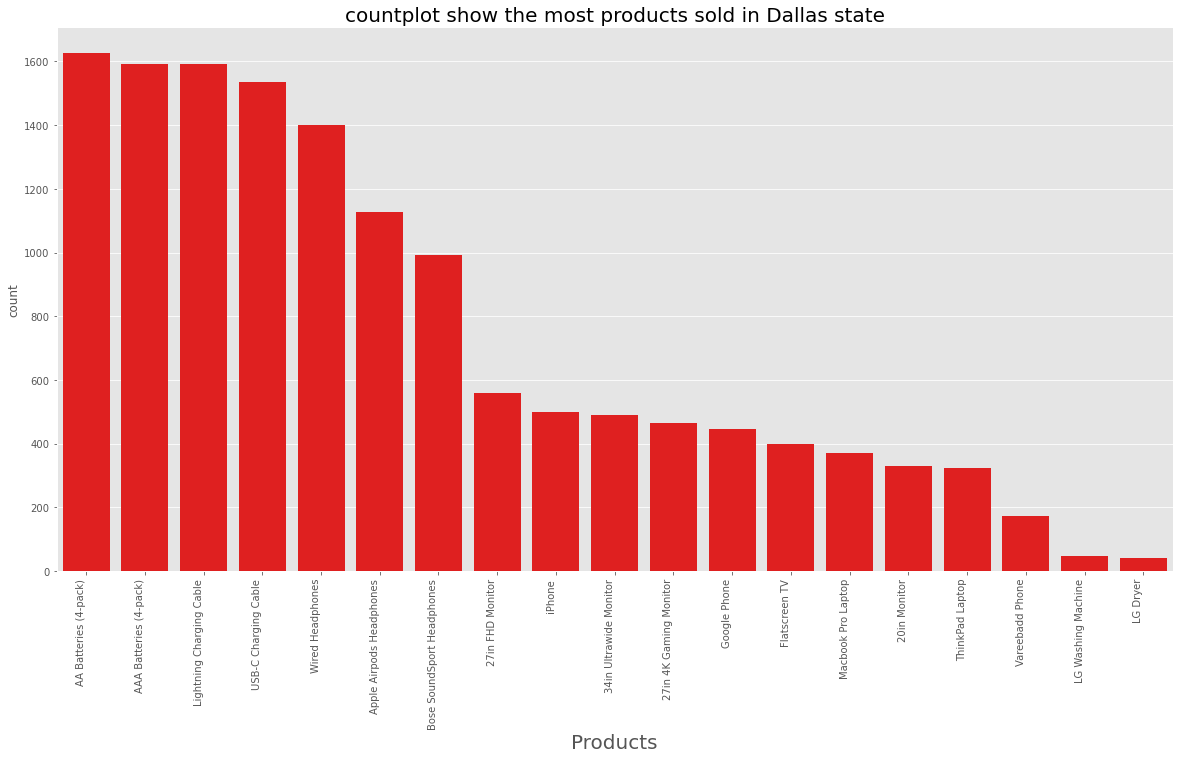

In [55]:
###countplot show the most products sold in Dallas state
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Cities']==' Dallas']['Product'] ,data = df ,color='red',
                   order=df[df['Cities']==' Dallas']['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in Dallas state',fontsize=20)
plt.show()

In [56]:
###countplot show the most products sold in Dallas state AA Batteries (4-pack)

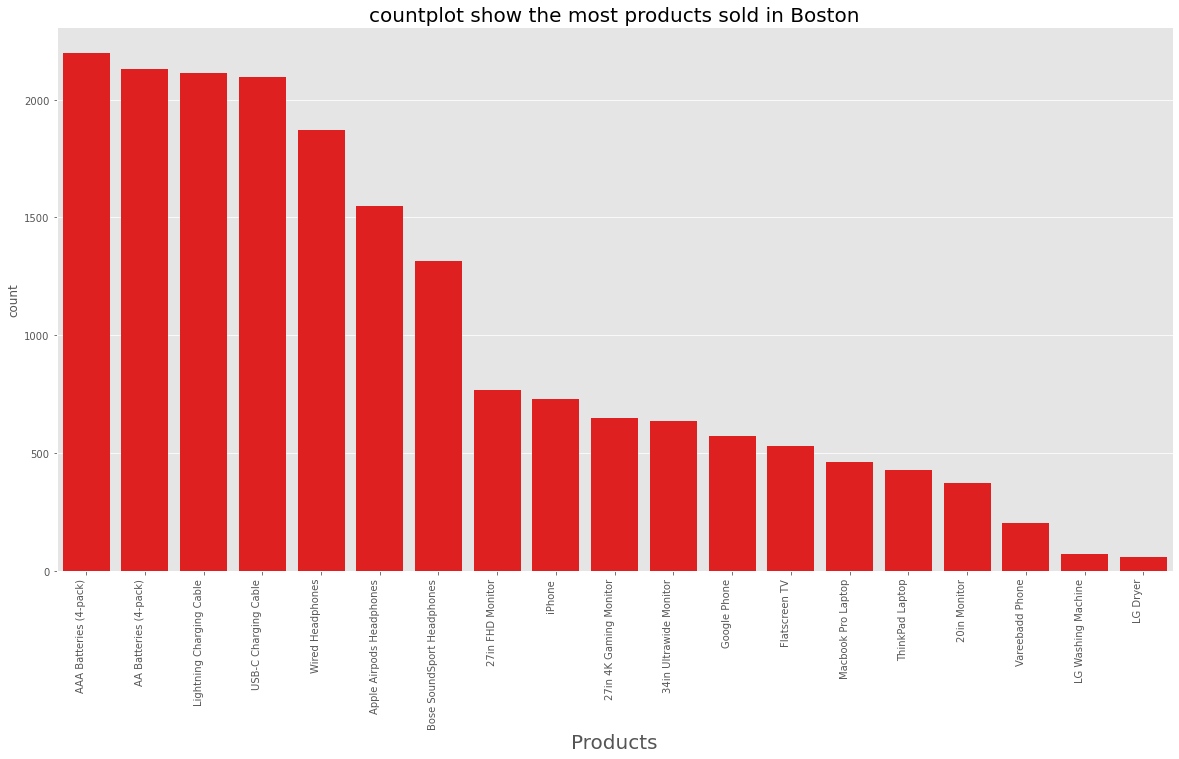

In [57]:
###countplot show the most products sold in Dallas state
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Cities']==' Boston']['Product'] ,data = df ,color='red'
                   ,order=df[df['Cities']==' Boston']['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in Boston',fontsize=20)
plt.show()

In [58]:
###countplot show the most products sold in Boston state AAA Batteries (4-pack)

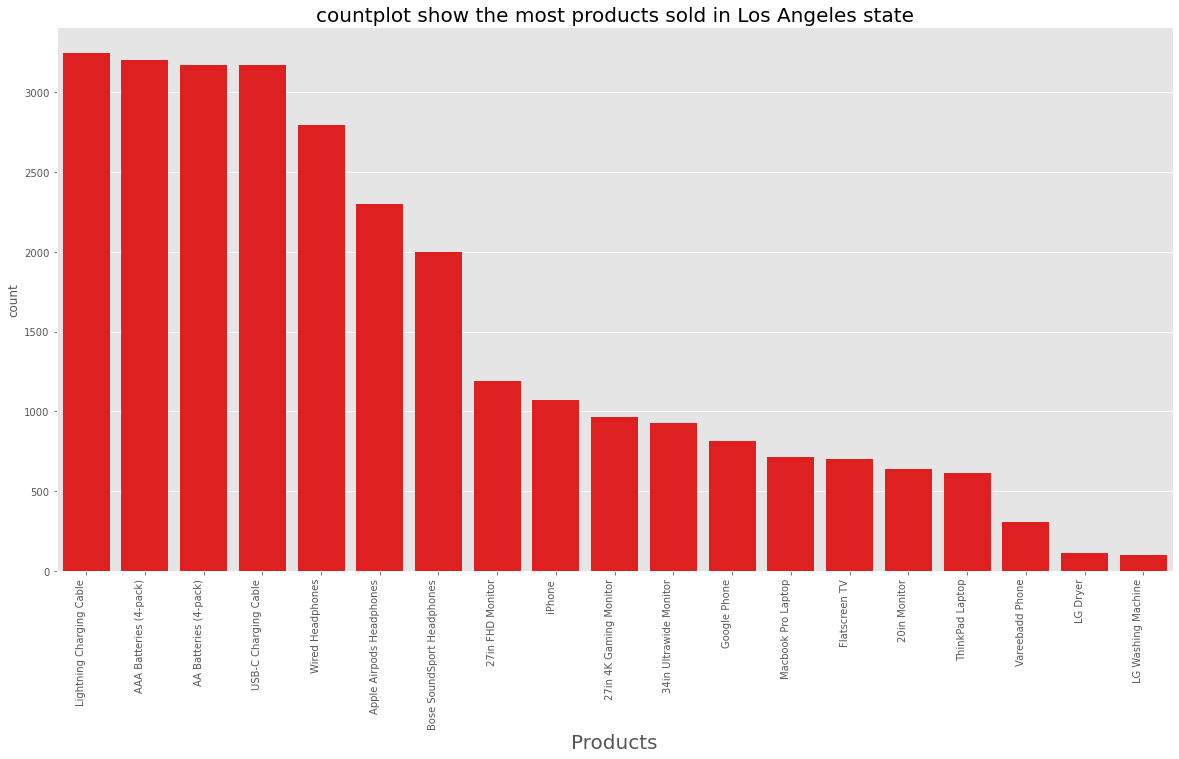

In [59]:
###countplot show the most products sold in Los Angeles state
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Cities']==' Los Angeles']['Product'] ,data = df ,color='red'
                   ,order=df[df['Cities']==' Los Angeles']['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in Los Angeles state',fontsize=20)
plt.show()

In [60]:
###countplot show the most products sold in Los Angeles state Lightning Charging Cable

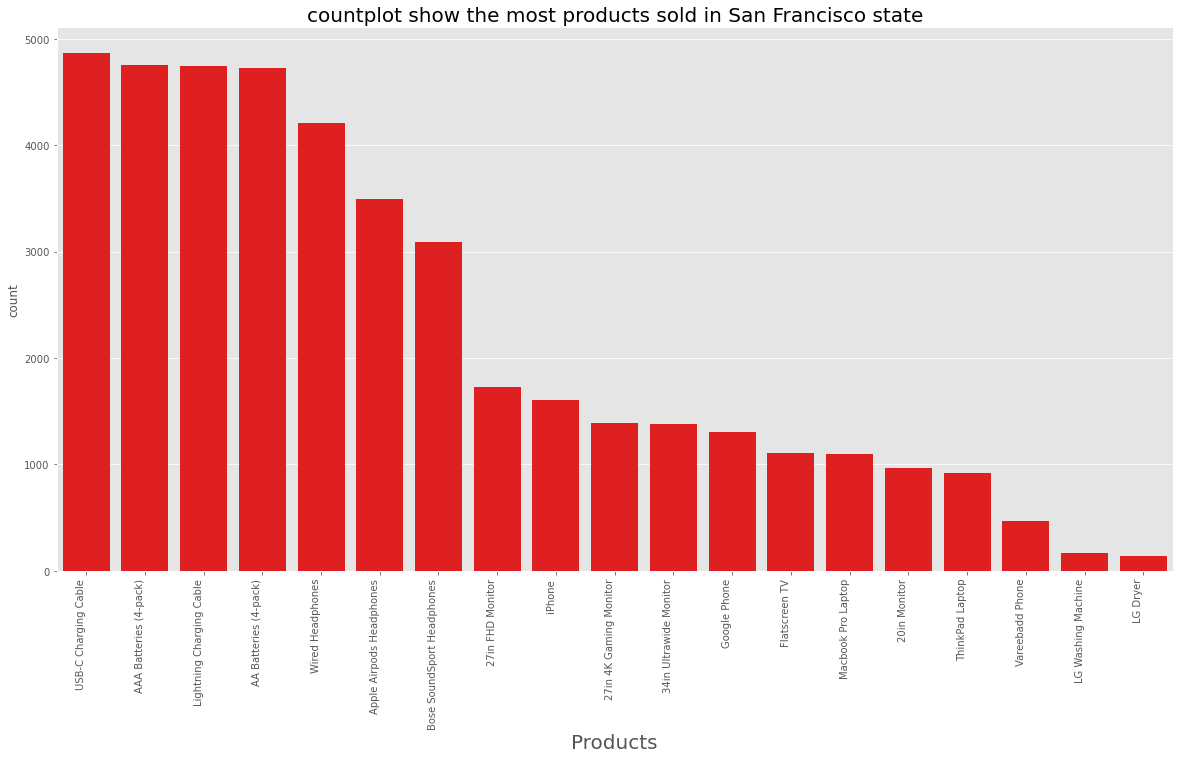

In [61]:
###countplot show the most products sold in San Francisco state
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Cities']==' San Francisco']['Product'] ,data = df ,color='red',
                   order=df[df['Cities']==' San Francisco']['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in San Francisco state',fontsize=20)
plt.show()

In [62]:
###countplot show the most products sold in San Franciscostate USB-C Charging Cable

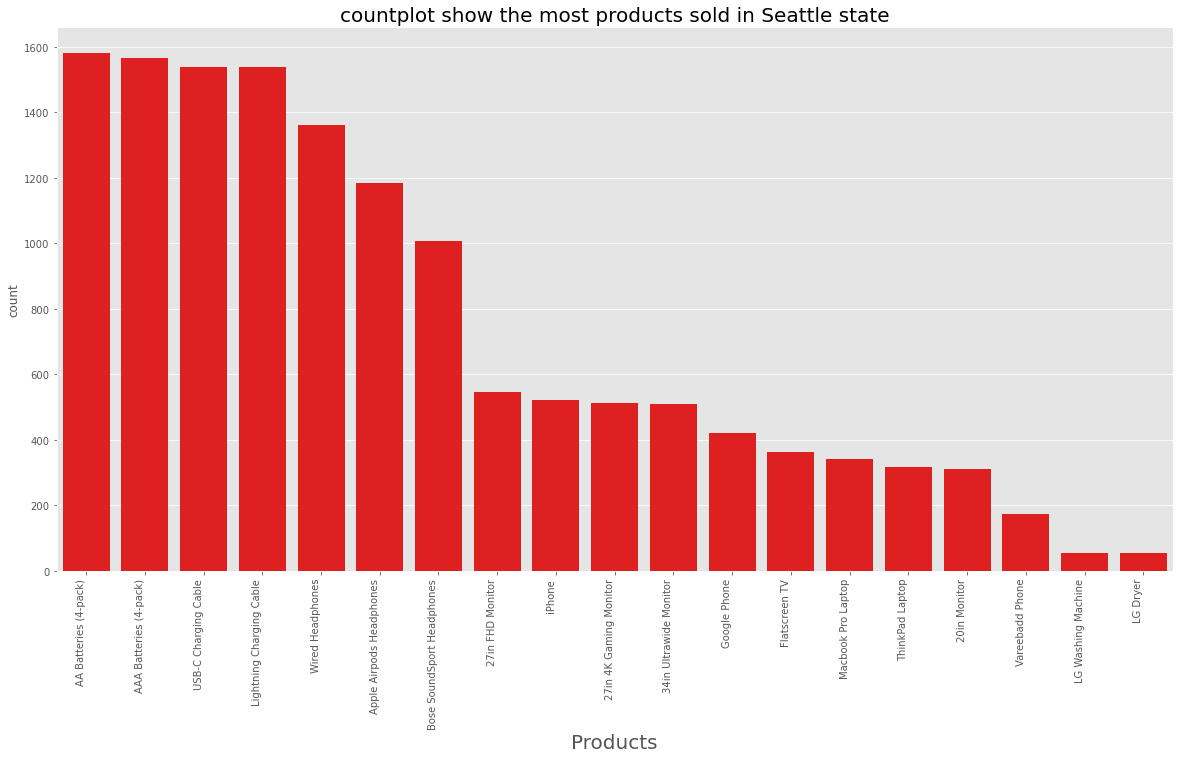

In [63]:
###countplot show the most products sold in Seattle state
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Cities']==' Seattle']['Product'] ,data = df ,color='red',
                   order=df[df['Cities']==' Seattle']['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in Seattle state',fontsize=20)
plt.show()

In [64]:
###countplot show the most products sold in Seattle state USB-C Charging Cable AA Batteries (4-pack)

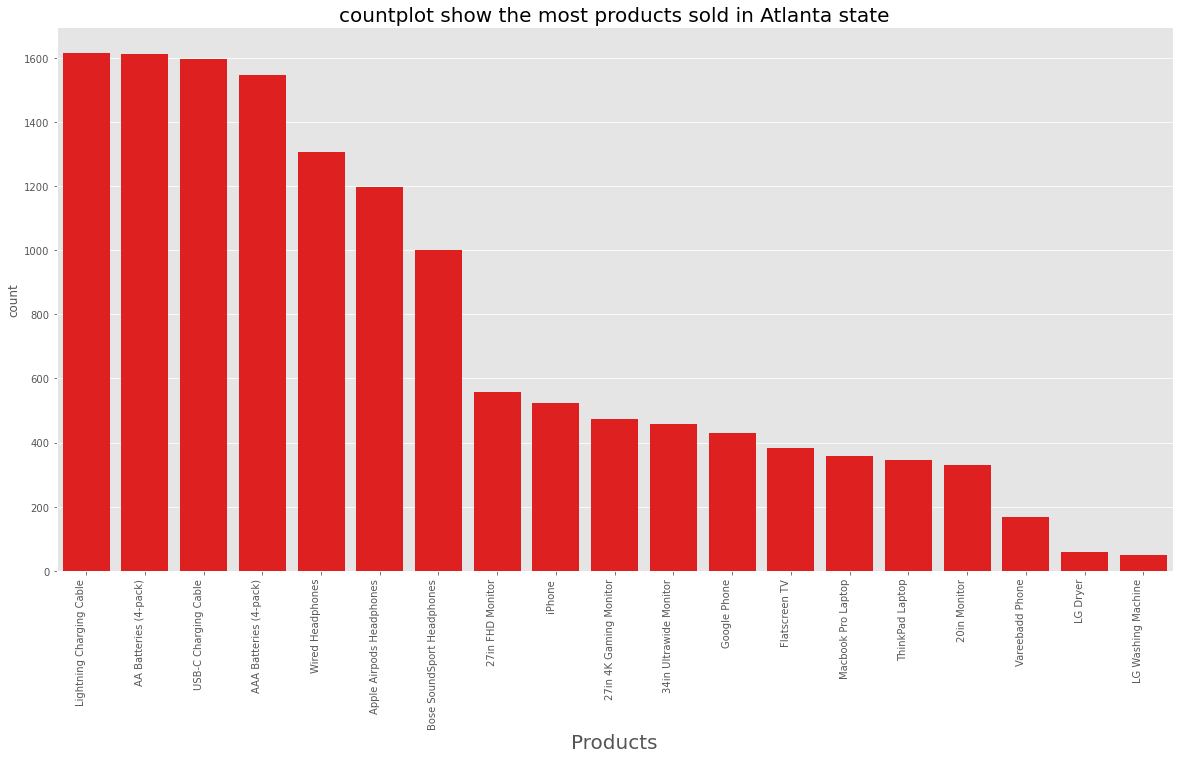

In [65]:
###countplot show the most products sold in Atlanta state
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Cities']==' Atlanta']['Product'] ,data = df ,color='red',
                   order= df[df['Cities']==' Atlanta']['Product'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in Atlanta state',fontsize=20)
plt.show()

In [66]:
###countplot show the most products sold in Atlanta state Lightning Charging Cable

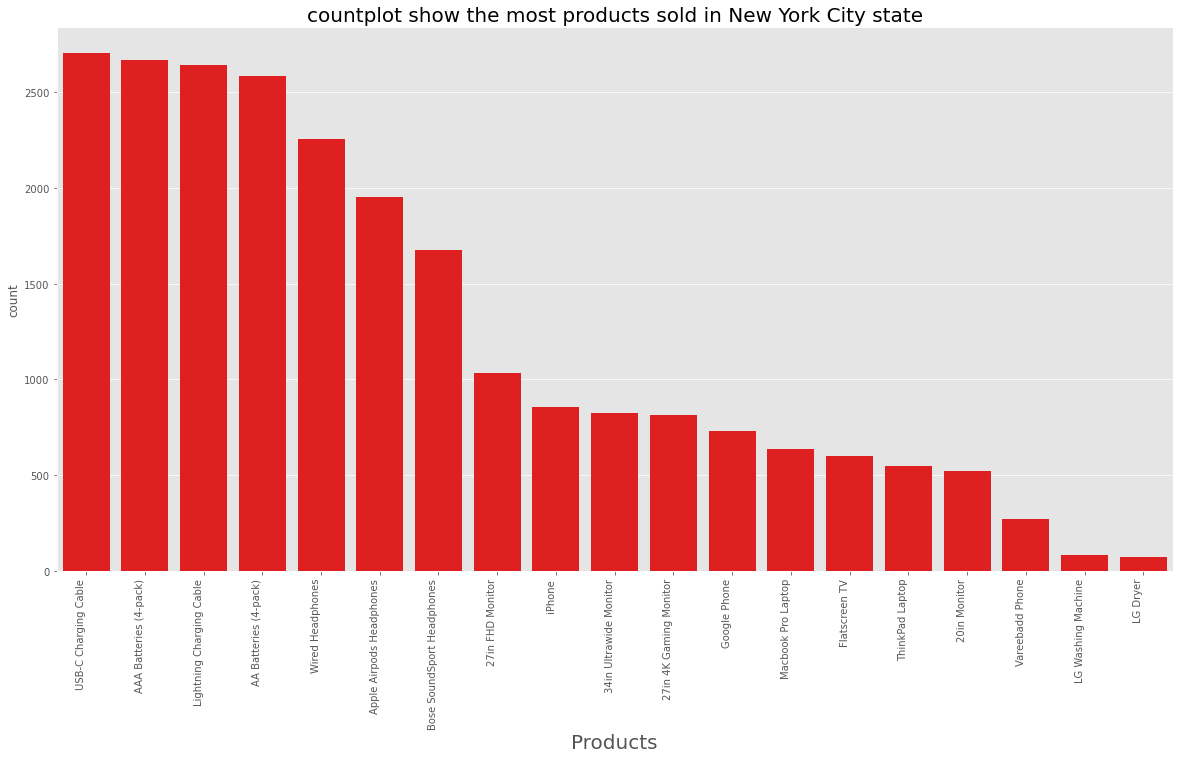

In [67]:
###countplot show the most products sold in New York City state
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Cities']==' New York City']['Product'] ,data = df ,color='red',
                   order=df[df['Cities']==' New York City']['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in New York City state',fontsize=20)
plt.show()

In [68]:
###countplot show the most products sold in New York City state USB-C Charging Cable

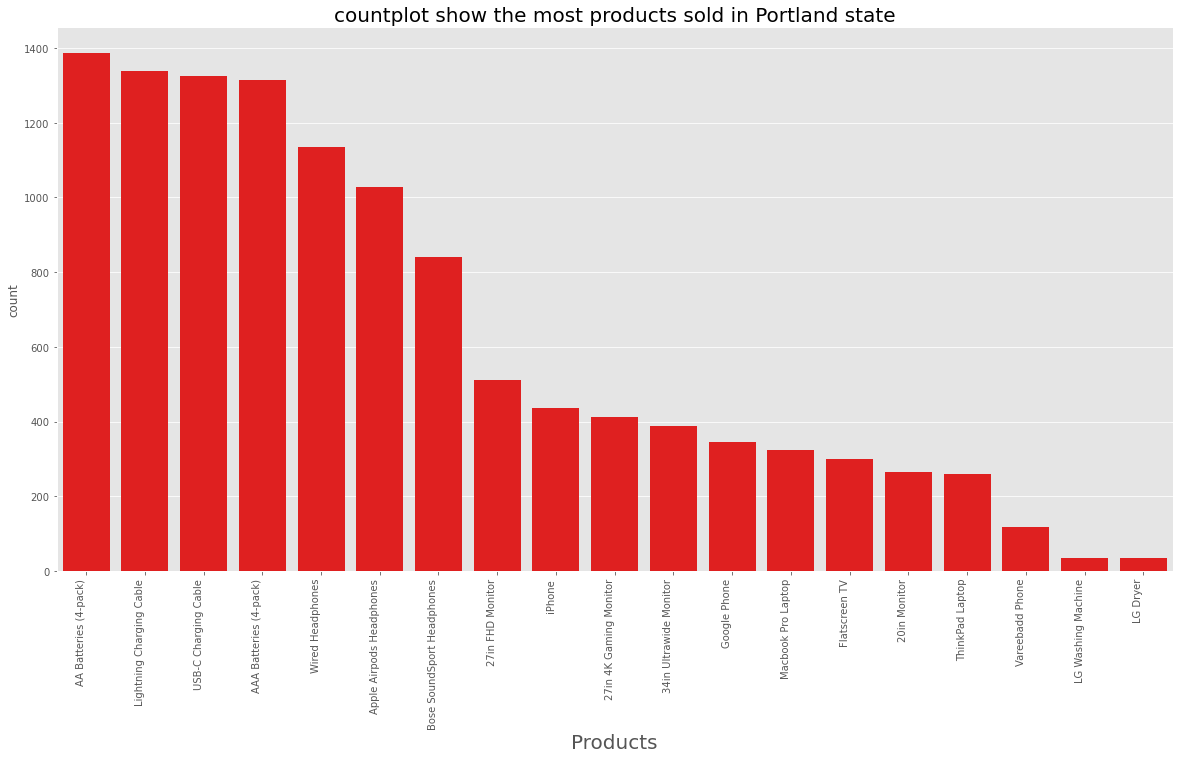

In [69]:
###countplot show the most products sold in Portland state
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Cities']==' Portland']['Product'] ,data = df ,color='red',
                   order=df[df['Cities']==' Portland']['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in Portland state',fontsize=20)
plt.show()

In [70]:
###countplot show the most products sold in Portland state AA Batteries (4-pack)

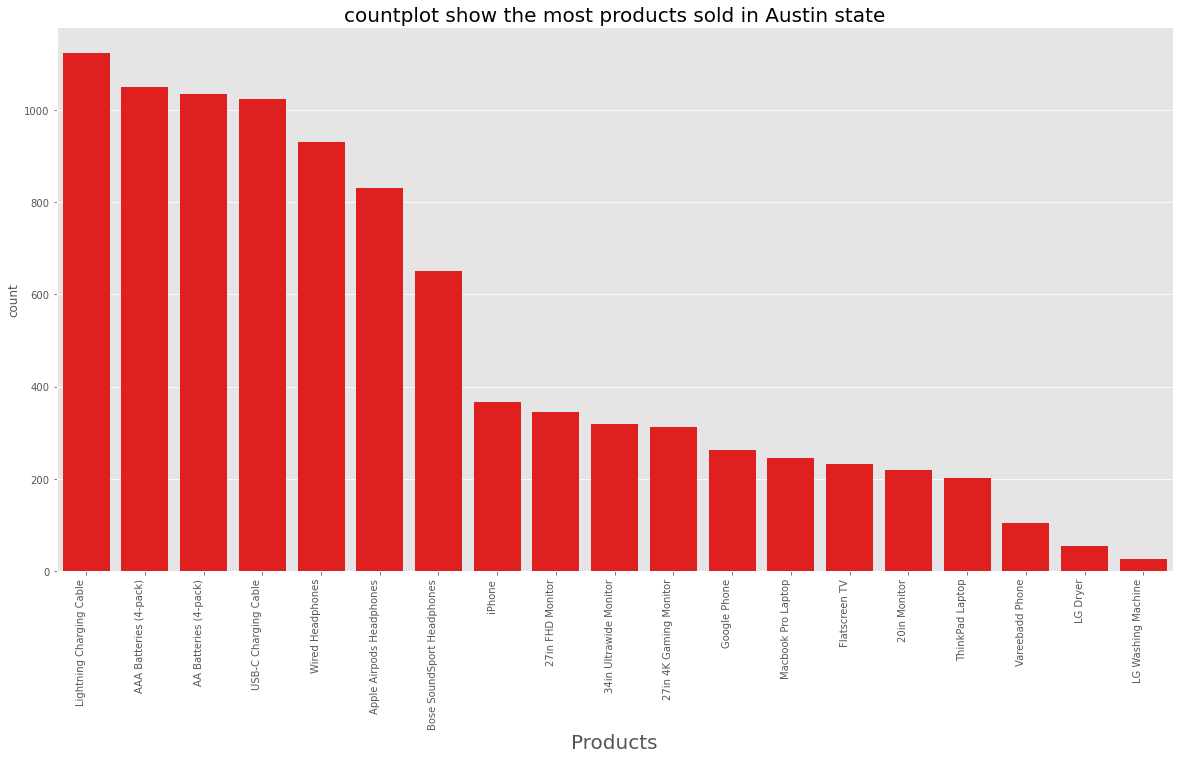

In [71]:
###countplot show the most products sold in Austin state
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df[df['Cities']==' Austin']['Product'] ,data = df ,color='red'
                   ,order=df[df['Cities']==' Austin']['Product'].value_counts().index );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.xlabel('Products',fontsize=20)
plt.style.use("ggplot")
plt.title( 'countplot show the most products sold in Austin state',fontsize=20)
plt.show()

In [72]:
###countplot show the most products sold in Austin state Lightning Charging Cable

In [73]:
#### Done